# Tweeter API call, store the data to a CSV file

In [1]:
#Code to get the tweeter data, get the url, copy the pin and paste here.
import tweepy
import webbrowser
import time
cosumer_key = "vQOWNASyo8XuilBewBdKISyVE"
consumer_secret = "TCJeRSk2R1HpK0Fx3PDrYfvuezuGUYLfG7yiwtYjykcTskIysF"
callback_url = 'oob' # URL : https://
auth = tweepy.OAuthHandler(cosumer_key, consumer_secret, callback_url)
redirect_url = auth.get_authorization_url()
print(redirect_url)
webbrowser.open(redirect_url)
user_pin_input = input("What's the pin number? ")
user_pin_input
auth.get_access_token(user_pin_input)
print(auth.access_token, auth.access_token_secret)
api = tweepy.API(auth)
me = api.me()
print(me.screen_name)

https://api.twitter.com/oauth/authorize?oauth_token=jdlAXgAAAAABOBRfAAABeSp66Y4
What's the pin number? 8306992
422268986-l2D9HR2hQg0nS9ZQmKiLVCAeFG7iiLKpUCGuFbNq FNcBeD3b1fsa9HGHg7DOwVsuVKQIP6QiONU7CeH5y5MIK
Rakesh_Singh01


# Code to Get the tweets

In [3]:
#Get the tweeter data for any of the company and store line by line code into a variable/file
import nltk
import pandas as pd
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
stock='TSLA'
q=stock
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """
#Code to get limited nymber of tweets
tweets = tweepy.Cursor(api.search,
                   q='TSLA',
                   lang="en",
                   since='2020-11-01').items(2000)

#print(type(tweets))
# Remove URLs
#Blank dataframe to store results
df = pd.DataFrame()

tweets_list = []
score_list=[]
prediction_list=[]

#Get each tweet and analyze the sentiment
for tweet in tweets:
    if (not tweet.retweeted) and ('RT @' not in tweet.text):
        sen=SentimentIntensityAnalyzer()
        sa=sen.polarity_scores(tweet.text)
        print(sa)
        '''
        if sa["pos"] > sa["neg"]:
            prediction = "Positive"
            score = prediction+":" +str(sa["pos"])
        else:
            prediction = "Negative"
            score = prediction+ ":"+str(sa["neg"])'''
        #Logic for Buy,sell, Hold : If Positive=Buy, Negative=Sell, Neutral=Hold
        if sa["compound"]>= 0.05:
            prediction="Positive"
            score = prediction+":" +str(sa["compound"])
            
        elif sa["compound"]<= -0.05:
            prediction="Negative"
            score = prediction+":" +str(sa["compound"])
        else:
            prediction="Neutral"
            score = prediction+":" +str(sa["compound"])
        
        #print(sa)
        #mod = sa + tweet.text
        score_list.append(score)
        #tweets_list.append(sa)
        tweets_list.append(tweet.text)
        prediction_list.append(prediction)
        
        #Store each tweets sentiment score in a dataframe
        df = df.append(pd.Series([score,tweet.text,prediction,tweet.created_at,q],index=['Score','Tweet','Prediction','CreatedDate','CompanyName']), ignore_index=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rakeshmac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.299, 'neu': 0.701, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.7263}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'compound': -0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.762, 'pos': 0.238, 'compound': 0.6124}
{'neg': 0.14, 'neu': 0.758, 'pos': 0.102, 'compound': -0.25}
{'neg': 0.066, 'neu': 0.804, 'pos': 0.13, 'compound': 0.3272}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.5904}
{'neg': 0.266, 'neu': 0.639, 'pos': 0.096, 'compound': -0.5754}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'compound': -0.8807}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.889, 'pos': 0.111, 'compound': 0.4574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'compound': 0.6705}
{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.7906}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.826, 'pos': 0.174, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.74, 'pos': 0.26, 'compound': 0.7456}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'com

{'neg': 0.251, 'neu': 0.453, 'pos': 0.296, 'compound': 0.3544}
{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4019}
{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.6705}
{'neg': 0.095, 'neu': 0.61, 'pos': 0.294, 'compound': 0.6757}
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.1779}
{'neg': 0.209, 'neu': 0.719, 'pos': 0.072, 'compound': -0.539}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.108, 'neu': 0.892, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.0516}
{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'compound': -0.6113}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.3987}
{'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.1027}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.59, 'neu': 0.41, 'pos': 0.0, 'compound': -0.802}
{'neg': 0.077, 'neu': 0.769, 'pos': 0.154, 'co

{'neg': 0.128, 'neu': 0.66, 'pos': 0.212, 'compound': 0.2565}
{'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'compound': 0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.189, 'neu': 0.664, 'pos': 0.147, 'compound': -0.296}
{'neg': 0.0, 'neu': 0.839, 'pos': 0.161, 'compound': 0.3612}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.0772}
{'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.4003}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.124, 'neu': 0.731, 'pos': 0.146, 'compound': 0.1007}
{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.4374}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.17, 'neu': 0.83, 'pos': 0.0, 'compound': -0.5093}
{'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.142, 'neu': 0.734, 'pos': 0.124, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.717, 'pos': 0.283, 'compound': 0.7579}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.7717}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.4199}
{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.5859}
{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.6697}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.6597}
{'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.742, 'pos': 0.258, 'compound': 0.765}
{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'compound': 0.296}
{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.8306}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.

{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4574}
{'neg': 0.102, 'neu': 0.732, 'pos': 0.166, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.6759}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.205, 'neu': 0.795, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.7639}
{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.357}
{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'compound': 0.4404}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.3182}
{'neg': 0.0, 'neu': 1.0

# Save data to csv for analysis

In [9]:
df.to_csv(r'TSLA.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)
print(df)

    CompanyName         CreatedDate Prediction             Score  \
0          TSLA 2021-05-02 00:31:49    Neutral       Neutral:0.0   
1          TSLA 2021-05-02 00:30:38    Neutral       Neutral:0.0   
2          TSLA 2021-05-02 00:28:34   Negative  Negative:-0.5719   
3          TSLA 2021-05-02 00:28:17   Negative  Negative:-0.7263   
4          TSLA 2021-05-02 00:28:16    Neutral       Neutral:0.0   
..          ...                 ...        ...               ...   
853        TSLA 2021-05-01 16:55:08   Negative   Negative:-0.128   
854        TSLA 2021-05-01 16:54:54   Positive   Positive:0.5719   
855        TSLA 2021-05-01 16:54:39   Positive   Positive:0.4019   
856        TSLA 2021-05-01 16:54:25   Positive   Positive:0.6369   
857        TSLA 2021-05-01 16:54:08    Neutral       Neutral:0.0   

                                                 Tweet  
0    @SardonicCanuck F board would never take TSLA ...  
1    Ethereum Is Suddenly Rocketing But Dogecoin Is...  
2    @ke6gwf

<ipython-input-9-f60a95768e9c>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df.to_csv(r'TSLA.csv'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')), mode='a', header=False)


# Get the accumulated score of prediction to display 'Buy,sell,Hold'

In [13]:
# Calculate the average of prediction to display the result
#df_TSLA = pd.read_csv(r'TSLA.csv')
cntPrediction=df['Prediction'].count()
print(cntPrediction)

858


# Buy, sell, hold percentage to help user take a decision

In [14]:
cntPositive=list(df.Prediction).count('Positive')
cntNegative=list(df.Prediction).count('Negative')
cntNeutral=list(df.Prediction).count('Neutral')
percentPositive=(cntPositive/cntPrediction)*100
percentNegative=(cntNegative/cntPrediction)*100
percentNeutral=(cntNeutral/cntPrediction)*100
print("Buy%  = ", percentPositive)
print("Sell% = ", percentNegative)
print("Hold% = ", percentNeutral)

Buy%  =  41.49184149184149
Sell% =  17.715617715617714
Hold% =  40.79254079254079


# Sending SMS to the user on decision

In [15]:
# Download the helper library from https://www.twilio.com/docs/python/install
import os
from twilio.rest import Client


# Your Account Sid and Auth Token from twilio.com/console
# and set the environment variables. See http://twil.io/secure
#account_sid = os.environ['AC2021d083d53ba956203c588ab4ff9c9b']
#auth_token = os.environ['66f965a306e5f153bca93d0bcf44e014']
account_sid = 'AC2021d083d53ba956203c588ab4ff9c9b'
auth_token = '66f965a306e5f153bca93d0bcf44e014'
client = Client(account_sid, auth_token)
analysis = 'Stock='+str(q) + ' Buy%='+ str(percentPositive) + ' Sell%=' + str(percentNegative) + ' Hold%=' + str(percentNeutral)
#body = 'Buy=%d Sell=%d Hold=%d'
message = client.messages.create(
                              body=analysis,
                              from_='+13142549333',
                              to='+12024289119'
                          )

print(message.sid)
print(message)

SM2f80a24badeb441299b78bad7d0ae81a
<Twilio.Api.V2010.MessageInstance account_sid=AC2021d083d53ba956203c588ab4ff9c9b sid=SM2f80a24badeb441299b78bad7d0ae81a>


# Dataframe to plot graphs

In [16]:
#Create a dataframe to plot graphs
df_TSLAgraph=pd.DataFrame([[q,percentPositive,percentNegative,percentNeutral]],columns=['CompanyName','Buy','Sell','Hold'])
print(df_TSLAgraph)

  CompanyName        Buy       Sell       Hold
0        TSLA  41.491841  17.715618  40.792541


# Create Graph

<AxesSubplot:>

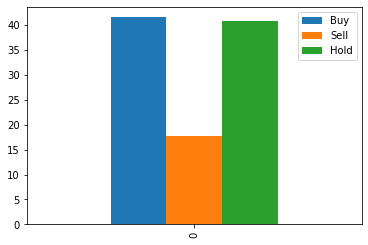

In [17]:
df_TSLAgraph.plot.bar()